In [1]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

<font size="5" color="red">ch01 MNIST DNN CNN</font>

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist  # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical  # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from matplotlib import pyplot as plt  # 학습과정 loss와 acc 시각화

In [3]:
# 1. 데이터 셋

width = 28; height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

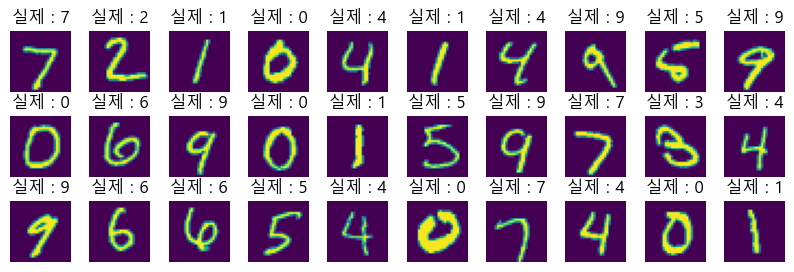

In [4]:
plt_row = 3
plt_col = 10
# plt.figure(figsize = (plt_col, plt_row))
plt.rcParams['figure.figsize'] = [plt_col, plt_row]
plt.rc("font", family = "Malgun Gothic")  # window에서 한글 시각화
# plt.rc("font", family = "NanumBarunGothic")  # 코랩에서 한글 시각화
fig, axes = plt.subplots(plt_row, plt_col)
# axes[0, 0].imshow(X_test[0].reshape(width, height))
# axes[0, 0].axis('off')
# title = "실제:{}".format(y_test[0])
# axes[0, 0].set_title(title)
plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
for i in range(plt_row * plt_col) :
    subax = axes[i // plt_col, i % plt_col]  # // : 몫연산자, % : 나머지연산자
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title = "실제 : {}".format(y_test[i])
    subax.set_title(title)
# plt.tight_layout()

# 1. DNN

In [7]:
%%time

# 1. 데이터 생성 및 전처리
width = 28; height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 독립변수 (28,28) → 784 1차원 → 실수형변환 → 스케일조정
X_train = X_train.reshape(-1, width * height).astype('float32') / 255.0
X_val = X_val.reshape(-1, width * height).astype('float32') / 255.0
X_test = X_test.reshape(-1, width * height).astype('float32') / 255.0

# 타겟변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

# 2. 모델 구성
model = Sequential([
    Input(shape=(width * height,)),
    Dense(units = 1024, activation = 'relu'),
    Dropout(0.3),
    Dense(units = 512, activation = 'relu'),
    Dropout(0.3),
    Dense(units = 256, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 10, activation = 'softmax')
])
# model.summary()

# 3. 학습설정
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 4. 학습
model.fit(X_train, Y_train,
         epochs = 50,
         validation_data = (X_val, Y_val),
         verbose = 1)

Epoch 1/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2702 - accuracy: 0.9179 - val_loss: 0.1212 - val_accuracy: 0.9628
Epoch 2/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.1429 - accuracy: 0.9577 - val_loss: 0.1037 - val_accuracy: 0.9705
Epoch 3/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.1116 - accuracy: 0.9675 - val_loss: 0.1032 - val_accuracy: 0.9729
Epoch 4/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0971 - accuracy: 0.9717 - val_loss: 0.0924 - val_accuracy: 0.9762
Epoch 5/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0811 - accuracy: 0.9761 - val_loss: 0.0883 - val_accuracy: 0.9761
Epoch 6/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0762 - accuracy: 0.9777 - val_loss: 0.0870 - val_accuracy: 0.9783
Epoch 7/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0659 - accuracy: 0.9801 - val_loss: 0.1108 -

In [8]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1758 - accuracy: 0.9829


[0.17575912177562714, 0.9829000234603882]

In [9]:
# 혼동행렬

from sklearn.metrics import confusion_matrix

print('실제값 :', y_test)
print('실제값 :', np.argmax(Y_test, axis = 1))
yhat = model.predict(X_test).argmax(axis = 1)
cmatrix = confusion_matrix(y_test, yhat)
cmatrix

실제값 : [7 2 1 ... 4 5 6]
실제값 : [7 2 1 ... 4 5 6]
313/313 [==============================] - 1s 4ms/step


array([[ 972,    1,    0,    1,    0,    0,    3,    1,    2,    0],
       [   0, 1127,    2,    1,    0,    1,    2,    0,    2,    0],
       [   3,    0, 1019,    1,    3,    0,    0,    5,    1,    0],
       [   0,    0,    5,  987,    0,    5,    0,    6,    4,    3],
       [   1,    1,    5,    0,  960,    0,    6,    1,    2,    6],
       [   3,    0,    0,    3,    0,  879,    2,    0,    2,    3],
       [   3,    3,    0,    0,    1,    1,  948,    0,    2,    0],
       [   0,    6,   12,    1,    0,    0,    0, 1003,    2,    4],
       [   0,    1,    5,    2,    3,    4,    0,    3,  951,    5],
       [   2,    4,    1,    1,    7,    4,    0,    3,    4,  983]],
      dtype=int64)

In [10]:
# 실제값과 예측값이 다른 개수 찾는 방법 1

cnt = 0
for i, row in enumerate(cmatrix) :
    for j, data in enumerate(row) :
        if i != j :
            cnt += data
print('예측이 틀린 갯수 :', cnt)

예측이 틀린 갯수 : 171


In [11]:
# 실제값과 예측값이 다른 개수 찾는 방법 2
cnt = 0
for y, h in zip(y_test, yhat) :
    if y != h :
        cnt += 1
print('예측이 틀린 갯수 :', cnt)

예측이 틀린 갯수 : 171


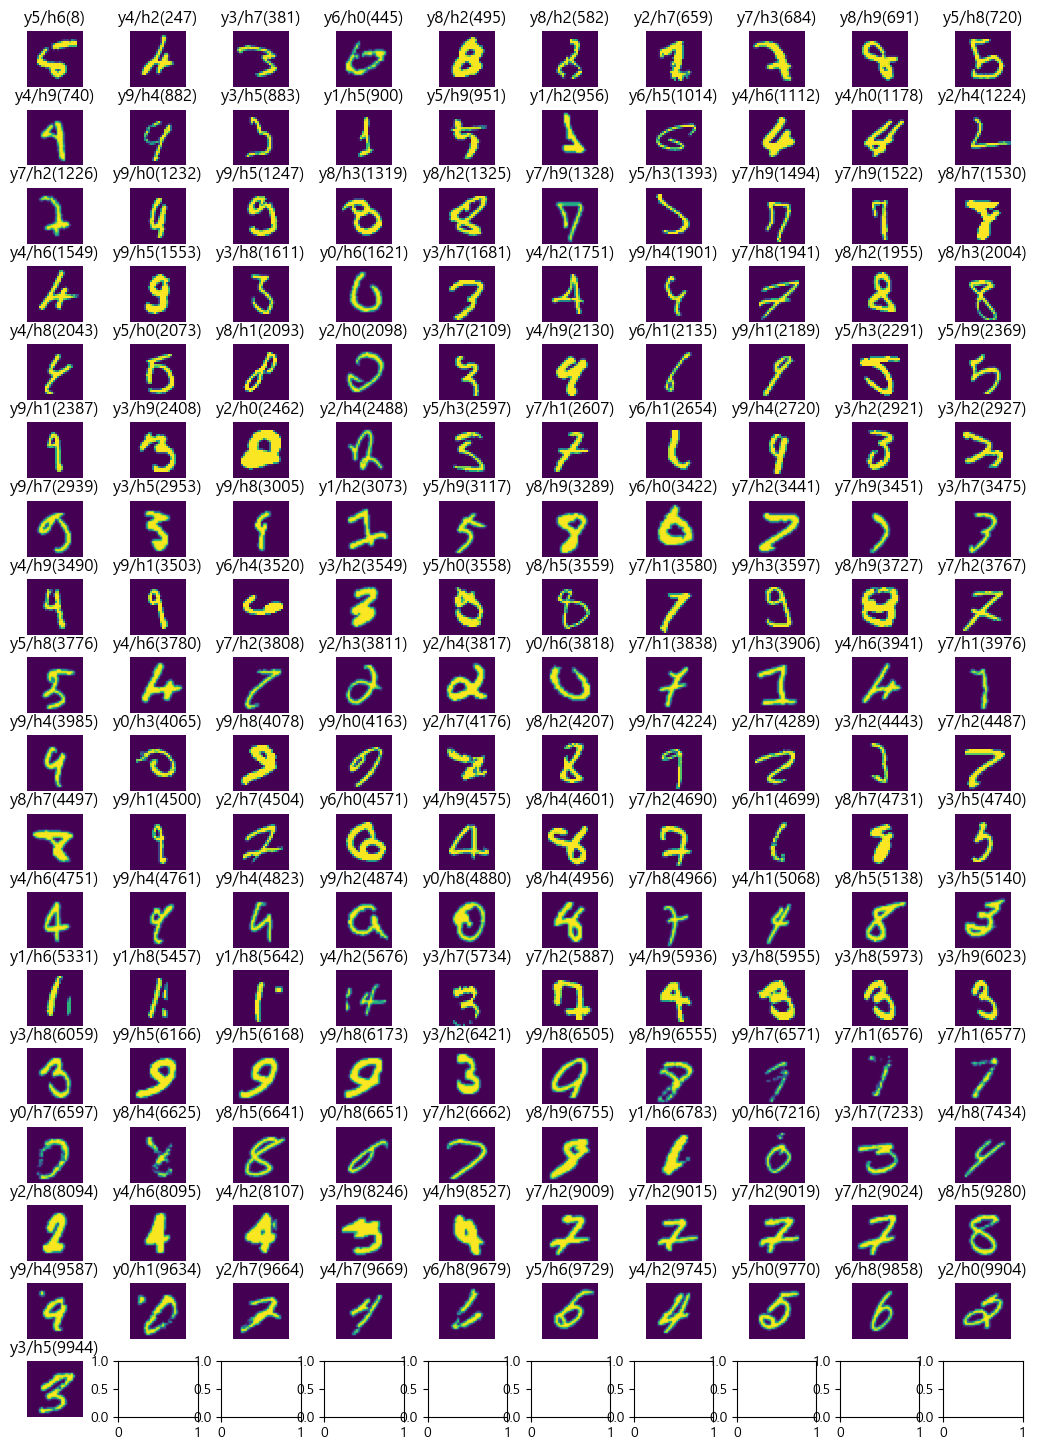

In [12]:
# CNN을 사용하여 예측이 틀린 데이터 출력 (yhat과 y_test가 다른 것들 171개)

plt_row = 18
plt_col = 10
plt.rcParams['figure.figsize'] = [plt_col + 3, plt_row]
plt.rc("font", family = "Malgun Gothic")  # window에서 한글 시각화
# plt.rc("font", family = "NanumBarunGothic")  # 코랩에서 한글 시각화
fig, axes = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(hspace = 0.4, wspace = 0.3)

i = 0  # yhat과 y_test의 index → yhat[i], y_test[i]를 비교
cnt = 0  # 이미지 출력 횟수

while (i < len(y_test)) & (cnt < plt_row * plt_col) :
    if yhat[i] == y_test[i] :
        i += 1
        continue
    subax = axes[cnt // plt_col, cnt % plt_col]  # // : 몫연산자, % : 나머지연산자
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title = "y{}/h{}({})".format(y_test[i], yhat[i], i)
    subax.set_title(title)
    cnt += 1  # 이미지 출력 번호 증가
    i += 1  # index 증가
# plt.tight_layout()

# 2. CNN (컨볼루션 레이어 포함) - 교안 31page

In [8]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist  # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical  # 원핫인코딩
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Input, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping 
from matplotlib import pyplot as plt  # 학습과정 loss와 acc 시각화
from sklearn.metrics import confusion_matrix

In [9]:
%%time

# 1. 데이터 생성 및 전처리
width = 28; height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 독립변수 (28,28) → 784 1차원 → 실수형변환 → 스케일조정
X_train = X_train.reshape(-1, width, height).astype('float32') / 255.0
X_val = X_val.reshape(-1, width, height).astype('float32') / 255.0
X_test = X_test.reshape(-1, width, height).astype('float32') / 255.0

# 타겟변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

CPU times: total: 312 ms
Wall time: 326 ms


((50000, 28, 28),
 (50000, 10),
 (10000, 28, 28),
 (10000, 10),
 (10000, 28, 28),
 (10000, 10))

In [10]:
# 2. 모델 생성

model = Sequential()
model.add(Conv2D(filters = 32,  # 필터수
                 kernel_size = 3,  # 필터사이즈 (3,3)
                 padding = 'same',  # zero-padding을 하면 출력사이즈도 동일
                 input_shape = (width, height, 1),  # (입력 채널 : 1, 필터 : 32) → 28 * 28 * 32 채널 출력
                 activation = 'relu'
                 ))
model.add(MaxPooling2D(pool_size = 2))  # → 14 * 14 * 32
model.add(Dropout(0.1))
model.add(Conv2D(64, (3, 3), activation = 'relu'))  # → ((14 - 3 + 1) * (14 - 3 + 1) * 32) * 64
model.add(MaxPooling2D(pool_size = (2, 2)))  # → 6 * 6
model.add(Dropout(0.25))
model.add(Flatten())  # 입력을 1차원으로 만들어줌
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)         

In [12]:
%%time

# 3. 학습설정
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 4. 학습
earlyStopping = EarlyStopping(patience = 20)
hist = model.fit(X_train, Y_train,
                epochs = 50,
                batch_size = 32,
                validation_data = (X_val, Y_val),
                callbacks = [earlyStopping])

Epoch 1/50
1563/1563 [==============================] - 35s 22ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0414 - val_accuracy: 0.9923
Epoch 2/50
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0412 - val_accuracy: 0.9921
Epoch 3/50
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0193 - accuracy: 0.9940 - val_loss: 0.0429 - val_accuracy: 0.9924
Epoch 4/50
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0151 - accuracy: 0.9946 - val_loss: 0.0461 - val_accuracy: 0.9915
Epoch 5/50
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0363 - val_accuracy: 0.9925
Epoch 6/50
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.0398 - val_accuracy: 0.9925
Epoch 7/50
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.0382 -

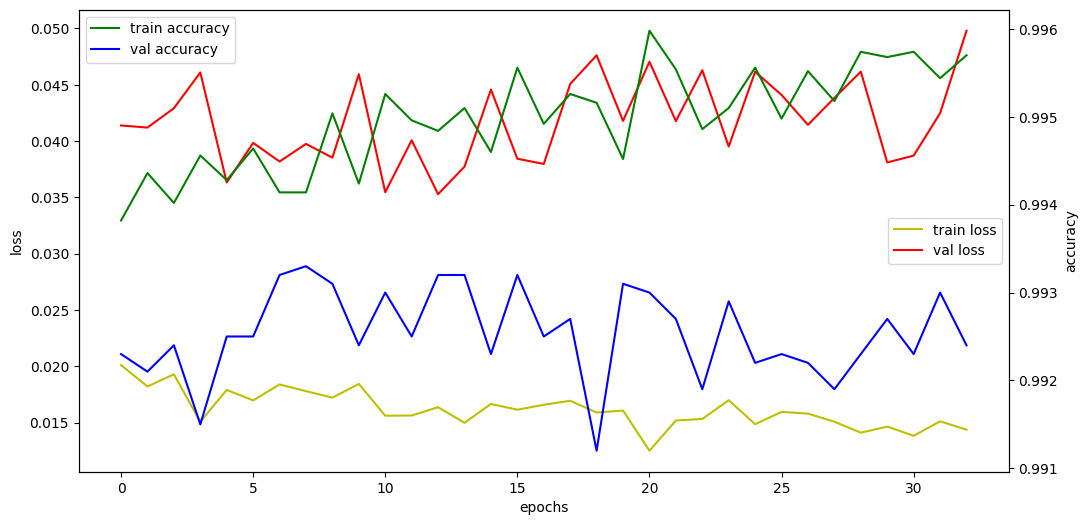

In [13]:
# 5. 모델 학습과정 시각화

fig, loss_ax = plt.subplots(figsize = (12, 6))
loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label = 'val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend(loc = 'upper left')
plt.show()

In [14]:
# 6. 모델 평가 (evaluate : 테스트셋, 교차표, recall, precision : y실제값, y예측값)
loss, acc = model.evaluate(X_test, Y_test, verbose = 0)
loss, acc 

(0.030098386108875275, 0.9941999912261963)

In [15]:
print('실제값 :', y_test)
print('실제값 :', Y_test.argmax(axis = 1))
yhat = np.argmax(model.predict(X_test), axis = 1)
print('예측값 :', yhat)

실제값 : [7 2 1 ... 4 5 6]
실제값 : [7 2 1 ... 4 5 6]
313/313 [==============================] - 2s 5ms/step
예측값 : [7 2 1 ... 4 5 6]


In [16]:
cmatrix = confusion_matrix(y_test, yhat)
cmatrix

array([[ 978,    0,    0,    0,    0,    0,    1,    0,    0,    1],
       [   0, 1130,    0,    1,    0,    1,    1,    2,    0,    0],
       [   1,    0, 1023,    1,    0,    0,    0,    7,    0,    0],
       [   0,    0,    0, 1006,    0,    2,    0,    1,    1,    0],
       [   0,    0,    0,    0,  977,    0,    2,    0,    0,    3],
       [   1,    0,    0,    5,    0,  885,    1,    0,    0,    0],
       [   1,    1,    0,    0,    1,    1,  954,    0,    0,    0],
       [   0,    0,    3,    0,    1,    0,    0, 1021,    1,    2],
       [   1,    0,    2,    1,    0,    1,    0,    0,  969,    0],
       [   1,    0,    0,    1,    4,    2,    0,    1,    1,  999]],
      dtype=int64)

In [17]:
# 실제값과 예측값이 다른 개수 찾는 방법 1

cnt = 0
for y, h in zip(y_test, yhat) :
    if y != h :
        cnt += 1
print('예측이 특린 갯수 :', cnt)

예측이 특린 갯수 : 58


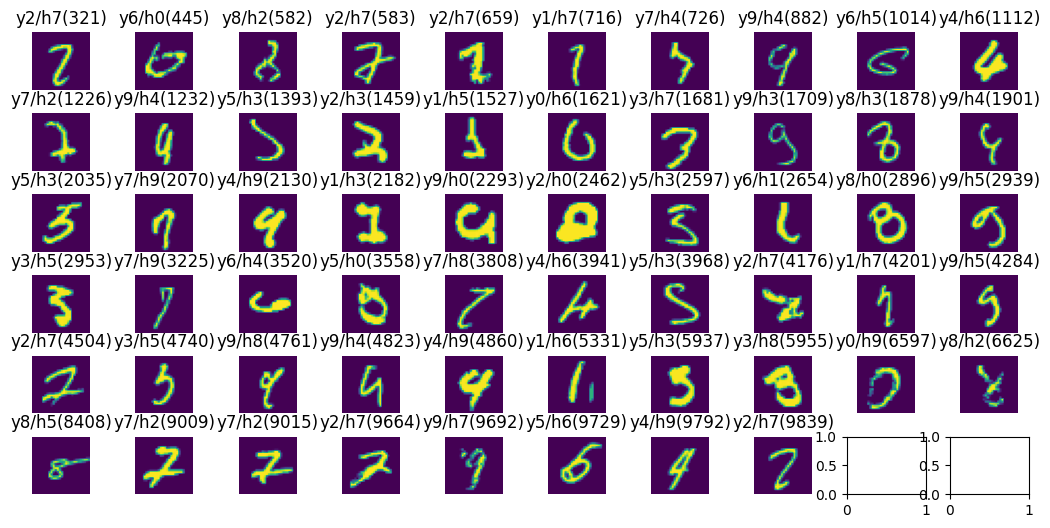

In [19]:
# CNN을 사용하여 예측이 틀린 데이터 출력 (yhat과 y_test가 다른 것들 58개)
plt_row = 6
plt_col = 10
plt.rcParams['figure.figsize'] = [plt_col + 3, plt_row]
fig, axes = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(hspace = 0.4, wspace = 0.3)

i = 0  # yhat과 y_test의 index → yhat[i], y_test[i]를 비교 
cnt = 0  # 이미지 출력횟수

while (i < len(y_test)) & (cnt < plt_row*plt_col) :
    if yhat[i] == y_test[i] :
        i += 1
        continue
    subax = axes[cnt // plt_col, cnt % plt_col]  # // : 몫연산자, % : 나머지연산자
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title = "y{}/h{}({})".format(y_test[i], yhat[i], i)
    subax.set_title(title)
    cnt += 1  # 이미지 출력 번호 증가
    i += 1  # index 증가
# plt.tight_layout()